# Phase II Final Project Submission

* Student name: Sarah Lowing
* Student pace: self paced 
* Scheduled project review date/time: Friday 3/3 1:30
* Instructor name: Abhineet
* Blog post URL: https://wordpress.com/post/datamonsterdotblog.wordpress.com/47


## Overview
For this analysis we'll be using the King's County Sales dataset, which can be found in kc_house_data.csv.  Each record represents a house sale in the Seattle area for the year 2021-2022.  We will use this data to determine mean price of a home in each neighborhood using zipcodes to group areas.  After ruling out potential price boosters, such as waterfront homes, or homes with access to amenities such as parks or greenways, we'll also examine the impact of home grade on the price of a home in order to maximize our saving potential for our client, a real estate agent looking to find the elusive midrange home for sale in the Kings County metro area.

### Business Understanding
Purchasing a home is one of the largest financial commitments most people will make in their lifetimes.  Todays real estate markets are suffering for a lack of supply of mid-sized starter homes and our client, a real estate agent, specializes in exactly these kinds of homes.  We'll find the mean price of a home for each zipcode and then look to see what kinds of features- views, access to greenways, the overall condition/grade of a home are most likely to impact price in order to identify what kinds of areas and amenities we should avoid to find a resonably priced home in the extra tight market and highly inflated real estate market of Seattle.  We'll end with a list of reccomendaed neighborhoods for our agent to keep tabs on.

### Data Understanding
After checking our data for missing or null values, we wil begin performing some simple statistical analysis to determine which variables have an existing and obvious correlation to our target variable, 'price'.  We'll examine the format of the data (numeric vs categorical, continuous vs discrete) to determine what, if any, transformations need to take place in order to perform  colinearity..  And finally we'll check for normality, and look to apply transformations (linear, logarythmic, polynomial regression or  to any data that does not conform to our L.I.N.E. acronym and is useful for our model and analysis. 

## Preliminary Data Analysis

In [96]:
# import neccessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm

### Inspect and Clean Data

In [204]:
## Check the columns and first few rows
kc= pd.read_csv('Data/kc_house_data.csv')
len(kc)

30155

In [205]:
kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [11]:
# Generate summary statistics
kc.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


We can see some of our mean values here, as well as visually inspect for for any missing values or irregularities.  So far it looks good!

##### Checking for NaN

In [206]:
#checking for null values
kc.isnull().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      32
sewer_system     14
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
dtype: int64

In [241]:
#Because of the small number of NaN values, we can drop null rows
kc.dropna(inplace=True)

#### Inspect Datatypes of Columns

In [207]:
#Visualize datatypes for future analysis
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

We can see that the data has several different types. Some potentially relevant data for 'price' is categorical, like 'waterfront' and 'condition'.  We'll need to OHE these features if we'd like to add those variables to our model.
None of our numeric variables are categorical in nature, with the exception of 'id', 'lat' and 'long'.  While we won't need these for our statistical analysis, 'lat' and 'long' could come in handy later if we want to map home sales.  

#### Inspect Distribution of Variables
We'll need to check if the distribution of our variables appears normal, which will alert us to outliers or if we will need to transform our data in order to progress with an effective model.  Let's view value counts of our kc dataframe to get a more concrete idea of how our categorical data is distributed and look for outliers

In [242]:
# Value counts for categorical data
categoricals = kc.select_dtypes("object")
categoricals=categoricals.drop(['date', 'address'], axis=1).copy()

In [209]:
for col in categoricals:
    print(kc[col].value_counts(), "\n")

NO     29636
YES      519
Name: waterfront, dtype: int64 

NO     29382
YES      773
Name: greenbelt, dtype: int64 

NO     24893
YES     5262
Name: nuisance, dtype: int64 

NONE         26589
AVERAGE       1915
GOOD           878
EXCELLENT      553
FAIR           220
Name: view, dtype: int64 

Average      18547
Good          8054
Very Good     3259
Fair           230
Poor            65
Name: condition, dtype: int64 

7 Average        11697
8 Good            9410
9 Better          3806
6 Low Average     2858
10 Very Good      1371
11 Excellent       406
5 Fair             393
12 Luxury          122
4 Low               51
13 Mansion          24
3 Poor              13
2 Substandard        2
1 Cabin              2
Name: grade, dtype: int64 

Gas                  20583
Electricity           6465
Oil                   2899
Gas/Solar               93
Electricity/Solar       59
Other                   20
Oil/Solar                4
Name: heat_source, dtype: int64 

PUBLIC                25777

#### Clean "grade"
We can see the vast number of houses on the market are of average quality.  There are very, very few houses being sold in the Seattle area that in what could be considered 'bad' condition.  We could consider predictors 'cabin' 'substandard', 'poor', 'luxury', and 'mansion' as outliers due to the small number of houses sold in those grades.  It might be worthwhile to drop those categories and convert the data to numeric from string to include in our next step, the review of numeric variables.

In [ ]:
grade_dict = {'1 Cabin':0, '2 Substandard':1, '3 Poor':2,'4 Low':3,'5 Fair':4,'6 Low Average':5,'7 Average':6, '8 Good':7,
              '9 Better':8, '10 Very Good':9, '11 Excellent':10, '12 Luxury':11, '13 Mansion':12 }
kc.grade.replace(to_replace=grade_dict,inplace=True) 

In [244]:
df_kc= kc[(kc['grade']<11) & (kc['grade']> 2)]


In [245]:
df_kc['grade'].value_counts()

5     11693
6      9400
7      3804
4      2852
8      1369
9       406
3       385
10      122
Name: grade, dtype: int64

### Adding Zipcodes to the DataFrame
So far everything looks good.  But it would be nice to have an additional column, "zip", that contains the zip code of each entry so that we can make sure our records are all actually located in King's County, as well as to group houses in neighborhoods for our model later on.  Let's make that now.

In [ ]:
#extract zip codes.  We should have 224 different zipcodes -but there's an extra 176
df_kc['zip'] = df_kc['address'].str.findall(r'([0-9]\d+)').apply(
    lambda x: x[-1] if len(x) >= 1 else '')

In [247]:
# examine zip codes, kc county homes ahould start with 98 but we clearly have some that do not 
zip_counts= df_kc['zip'].value_counts()
zip_counts

98042    990
98038    855
98103    761
98115    760
98117    744
        ... 
68031      1
45856      1
34601      1
07111      1
46032      1
Name: zip, Length: 399, dtype: int64

In [248]:
# closer look at address to double check that entries are erroneous, and not our code.  Clearly some bad data in here
df_bad_zips = df_kc[~df_kc['zip'].astype(str).str.startswith('98')]
df_bad_zips['address']

12       5712 A Street, Omaha, Nebraska 68106, United S...
53       1820 South State Street, Vineland, New Jersey ...
62       1804 Spruce Street, McLeansboro, Illinois 6285...
159      626 13th Street, Union City, New Jersey 07087,...
172      11th Avenue, West Babylon, New York 11704, Uni...
                               ...                        
30029    Avenue Cuts, 34 Ridge Rd, North Arlington, New...
30044    36th Avenue, Kenosha, Wisconsin 53142, United ...
30116    57th Street Lane NW, Rochester, Minnesota 5590...
30129    214 B, Mount Laurel, New Jersey 08054, United ...
30144    2954 Northwest 85th Street, Miami, Florida 331...
Name: address, Length: 911, dtype: object

In [249]:
#Does the address have Seattle, Washington in it?  
df_bad_zips[df_bad_zips['address'].str.contains('Washington')]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,zip
4137,2902200584,12/11/2021,750000.0,2,2.0,880,892,3.0,NO,NO,...,880,0,0,320,2017,0,"2213 Highway a, Washington, Missouri 63090, Un...",38.531593,-91.021341,63090
7064,597000591,4/13/2022,715000.0,3,2.5,1530,1101,2.0,NO,NO,...,1040,490,0,375,2009,0,"Beacon Ave, Washington, Pennsylvania 15301, Un...",40.105940,-80.317920,15301
10445,1959701116,3/17/2022,1325000.0,3,2.0,1440,980,2.0,NO,NO,...,960,480,0,510,2018,0,"2708 Highway a, Washington, Missouri 63090, Un...",38.534190,-91.020571,63090
12986,6003500644,11/21/2021,759950.0,2,2.0,1020,740,2.0,NO,NO,...,680,340,0,340,2020,0,"1728 East 11th Avenue, Spokane, Washington 992...",47.645200,-117.384760,99202
17304,2770602496,8/20/2021,789995.0,2,2.0,1310,1220,2.0,NO,NO,...,840,470,0,310,2013,0,"21st Avenue, Clarkston, Washington 99403, Unit...",46.389970,-117.056550,99403
18767,2902200797,9/7/2021,1224000.0,3,2.0,1640,1040,3.0,NO,NO,...,1640,0,0,580,2020,0,"2368 Highway a, Washington, Missouri 63090, Un...",38.524842,-91.025180,63090
22537,5414100061,1/2/2022,679950.0,2,2.0,1170,761,3.0,NO,NO,...,1170,0,0,290,2021,0,"East 32nd Avenue, Spokane, Washington 99203, U...",47.625580,-117.395840,99203
25314,1703400362,2/15/2022,879000.0,3,2.0,1610,1005,3.5,NO,NO,...,1610,0,0,230,2021,0,"4736 East 35th Avenue, Spokane, Washington 992...",47.622819,-117.347162,99223


In [250]:
# Doesn't look that way, so we'll drop the entries from the df in that are not from the Seattle area (df_bad_zips)
df_clean = df_kc[df_kc['zip'].astype(str).str.startswith('98')]
len(df_kc)

30031

In [251]:
#Check if we've got the right number of records 
bool(len(df_clean) + len(df_bad_zips)==len(df_kc))

True

## Review of Numeric Variables

This is also a relatively long list of variables/columns.  We'll want to make sure that there's no co-liniarity between the variables in our final model, so we'll take a look at a correlation heatmap of our dataframe to identify possible trouble spots for our numeric variables.

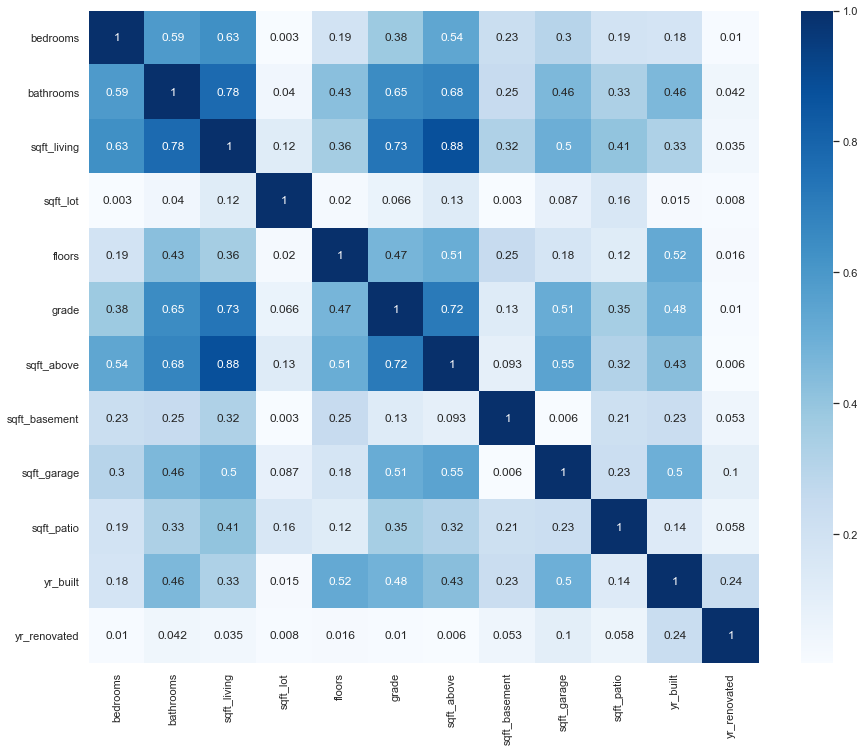

In [252]:
kc_colinearity = df_clean.drop(columns=['price', 'lat', 'long', 'id'])
corr = round(abs(kc_colinearity.corr()),3)
sns.set(rc = {'figure.figsize':(15,12)})
sns.heatmap(corr, cmap="Blues", annot=True);

We can see that there are some trouble spots in here, "sqft_living" has a collinear relationship with "sqft_above", followed by "bathrooms" and "bedrooms", if we use any of these variables it will be sqft_living.   We've already cleaned/prepared the other variable of interest, 'grade' so we can  we'll focus on examining and preparing "sqft_above" for use in a basic linear regression model. 

### Clean "sqft_living"

In [258]:
df_clean['sqft_living'].describe()

count    29120.000000
mean      2129.536401
std        959.054892
min          3.000000
25%       1440.000000
50%       1950.000000
75%       2640.000000
max      15360.000000
Name: sqft_living, dtype: float64

Our std of 959 indicates that we should also be looking for outliers- When considering mean house size, that's a pretty large margin of error (about 1/2 of the average sized house in KC) and so there must be houses that are exceptionally large that are skewing our model.  We cna also see from our min value of 3 that there might be some errors and outliers on the smaller side too.  However, we need to be very careful about how we do this, as removing data can lead to model manipulation and less acuuracy overall.  We'll remove all houses in the typical oulier range of 3%, to minimize model manipulation, but gain some accuracy in our predictions.  This will drop considerably fewer records than preserving the middle quartile range, so our model should still be fairly accurate.

In [259]:
q_low = df_clean['sqft_living'].quantile(0.03)

q_high = df_clean['sqft_living'].quantile(0.97)

In [264]:
kc_clean= df_clean[(df_clean['sqft_living']< q_high) & (df_clean['sqft_living']> q_low)]


In [266]:
len(df_clean)-len(kc_clean)

1785

In [268]:
kc_clean['sqft_living'].describe()

count    27335.000000
mean      2080.918456
std        772.169363
min        860.000000
25%       1470.000000
50%       1950.000000
75%       2580.000000
max       4279.000000
Name: sqft_living, dtype: float64

We can see that our std has dropped to 772 from 924 for sqft_living by dropping 1785 outliers out of 29,120 records.

In [269]:
# Build a model to fit a regression line and check the distribution of sqft_living 
yr=df_kc['price']
Xr=df_kc['sqft_living']

sgft_model_raw = sm.OLS(yr, sm.add_constant(Xr))
sqft_results_raw = sgft_model_raw.fit()


In [270]:
# Build a model to fit a regression line and check the distribution of sqft_living 
y=df_clean['price']
X=df_clean['sqft_living']

sgft_model = sm.OLS(y, sm.add_constant(X))
sqft_results = sgft_model.fit()


In [271]:
sqft_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                 1.693e+04
Date:                Tue, 28 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:31:27   Log-Likelihood:            -4.3286e+05
No. Observations:               29120   AIC:                         8.657e+05
Df Residuals:                   29118   BIC:                         8.657e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -6.107e+04   9859.635     -6.194      0.000   -8.04e+04   -4.17e+04
sqft_living   549.3447      4.222    130.127      0.000     541.070     557.619
==============================================================================
Omnibus:                    42508.698   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         55810627.050
Skew:                           8.344   Prob(JB):                         0.00
Kurtosis:                     216.821   Cond. No.                     5.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

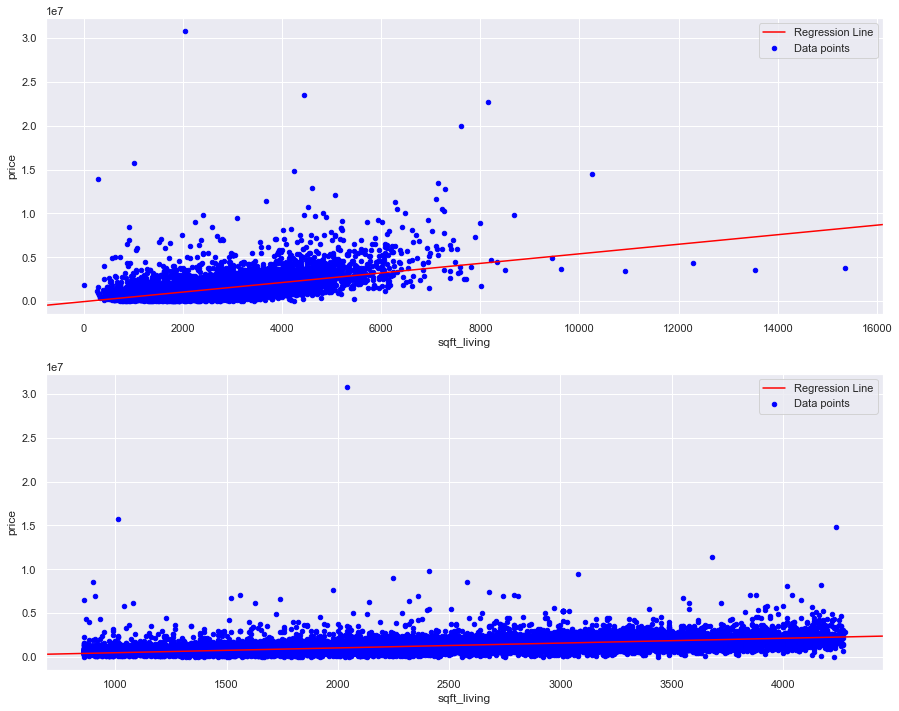

In [273]:
fig, (ax1,ax2) = plt.subplots(2)

df_clean.plot.scatter(x="sqft_living", y="price", label="Data points", color='blue', ax=ax1)
sm.graphics.abline_plot(model_results=sqft_results_raw, label="Regression Line", color='red', ax=ax1)
ax1.legend();

kc_clean.plot.scatter(x="sqft_living", y="price", label="Data points", color='blue', ax=ax2)
sm.graphics.abline_plot(model_results=sqft_results, label="Regression Line", color='red', ax=ax2)
ax2.legend();

We can see that minimizing outliers makes our data more linear, but we're not actually seeing a sharp increase in price per sqft as expected.  Instead, it seems that price increases only marginally as sqft does.  We'll need to examine our other variables to see what else contributes to upticks in prices.

### Summary: Numeric Variables

Our correlation matrix showed that sqft_living had the highest correlation to price.  And we can see from the plot above that when we remove outliers there's a linear relationship between sqft_living and price. 
 

## Review of Categorical Data
Lets' begin by looking at a model of all our categorical data to see which predictors would be the best candidates for including in our final model.

In [274]:
categoricals_clean = kc_clean.select_dtypes("object")
categoricals_clean=categoricals_clean.drop(['date', 'address', ], axis=1).copy()

In [275]:
y_raw = kc_clean["price"]
X_raw_cat = categoricals_clean
X_raw_cat = pd.get_dummies(X_raw_cat)

X_raw_cat.drop(['waterfront_NO', 'greenbelt_NO',
               'nuisance_YES', 'condition_Poor',
               'heat_source_Electricity', 'sewer_system_PUBLIC', 'zip_98045'], 
               axis=1, inplace=True)


In [276]:
cat_model= sm.OLS(y_raw, sm.add_constant(X_raw_cat))
cat_results = cat_model.fit()
cat_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     227.4
Date:                Tue, 28 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:32:27   Log-Likelihood:            -3.9711e+05
No. Observations:               27335   AIC:                         7.944e+05
Df Residuals:                   27227   BIC:                         7.953e+05
Df Model:                         107                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                           -8.436e+14   3.69e+16     -0.023      0.982   -7.32e+16    7.15e+16
waterfront_YES                   5.058e+05   2.96e+04     17.099      0.000    4.48e+05    5.64e+05
greenbelt_YES                    1.436e+05   1.98e+04      7.249      0.000    1.05e+05    1.82e+05
nuisance_NO                      7.396e+04   8278.696      8.933      0.000    5.77e+04    9.02e+04
view_AVERAGE                     8.436e+14   3.69e+16      0.023      0.982   -7.15e+16    7.32e+16
view_EXCELLENT                   8.436e+14   3.69e+16      0.023      0.982   -7.15e+16    7.32e+16
view_FAIR                        8.436e+14   3.69e+16      0.023      0.982   -7.15e+16    7.32e+16
view_GOOD                        8.436e+14   3.69e+16      0.023      0.982   -7.15e+16    7.32e+16
view_NONE                        8.436e+14   3.69e+16      0.023      0.982   -7.15e+16    7.32e+16
condition_Average                1.945e+05   7.75e+04      2.510      0.012    4.26e+04    3.46e+05
condition_Fair                  -6.263e+04   8.56e+04     -0.732      0.464    -2.3e+05    1.05e+05
condition_Good                   1.566e+05   7.76e+04      2.017      0.044    4444.033    3.09e+05
condition_Very Good              2.028e+05   7.79e+04      2.603      0.009    5.01e+04    3.56e+05
heat_source_Electricity/Solar   -5922.8428   6.86e+04     -0.086      0.931    -1.4e+05    1.28e+05
heat_source_Gas                  1.359e+05   8052.943     16.872      0.000     1.2e+05    1.52e+05
heat_source_Gas/Solar            3.496e+05   5.45e+04      6.408      0.000    2.43e+05    4.56e+05
heat_source_Oil                 -1.697e+04   1.19e+04     -1.422      0.155   -4.04e+04    6423.789
heat_source_Oil/Solar            1.135e+05   2.48e+05      0.458      0.647   -3.72e+05    5.99e+05
heat_source_Other                1.783e+05   1.14e+05      1.561      0.118   -4.55e+04    4.02e+05
sewer_system_PRIVATE             1.168e+04   1.05e+04      1.107      0.268   -8997.141    3.23e+04
sewer_system_PRIVATE RESTRICTED  2.179e+05    3.5e+05      0.622      0.534   -4.68e+05    9.04e+05
sewer_system_PUBLIC RESTRICTED   2.098e+05    3.5e+05      0.600      0.549   -4.76e+05    8.95e+05
zip_98001                        -3.97e+05   3.07e+04    -12.922      0.000   -4.57e+05   -3.37e+05
zip_98002                       -4.746e+05   3.57e+04    -13.309      0.000   -5.44e+05   -4.05e+05
zip_98003                        -4.05e+05   3.36e+04    -12.048      0.000   -4.71e+05   -3.39e+05
zip_98004                        1.751e+06   4.09e+04     42.867      0.000    1.67e+06    1.83e+06
zip_98005                        9.066e+05   4.65e+04     19.512      0.000    8.15e+05    9.98e+05
zip_98006                        6.225e+05    3.3e+04     18.866      0.000    5.58

Our model is statistically significant. There's collinearity between our variables, like "waterfront_yes" and "zip", and so moving forward we'll only include zip in our model.  Many of our variables are statistically significant, with a significant coefficient value as well.  As expected we see see variables like 'zip', 'waterfront_YES' make a big difference in 'price'.  Because we dropped the zip code in our model that was closest to the mean price, we can say that for each'zip' we could add or subtract the coefficient value from our intercept to find the gain or loss from the mean value of a house in that zipcode, if we had a better intercept (currently negative). Let's get a closer look at how our predictors interact with mean 'price', starting with our engineered column, 'zip'.

### Clean 'zip'

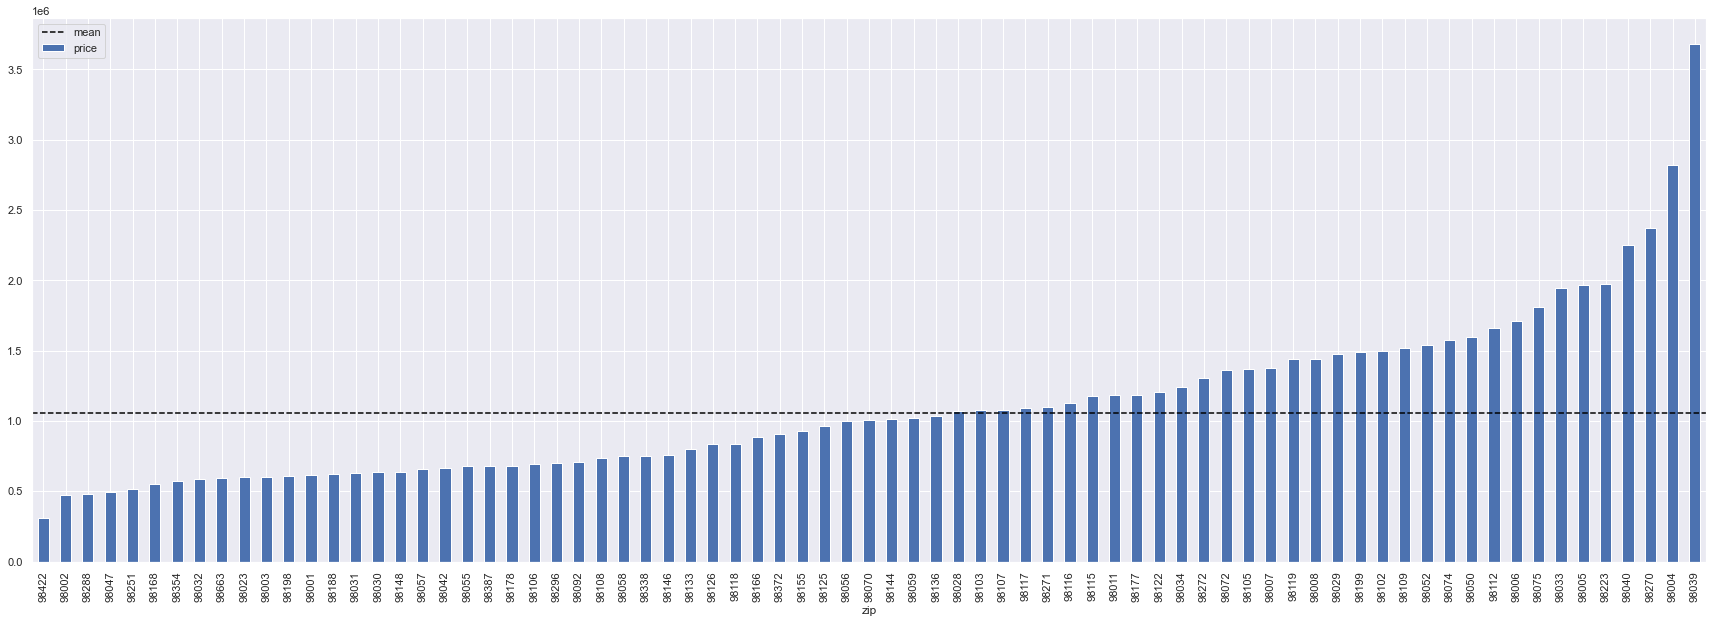

In [282]:
fig, ax = plt.subplots(figsize=(30,10))
kc_clean.groupby("zip").mean().sort_values(by="price").plot.bar(y="price", ax=ax)
ax.axhline(y=kc_clean["price"].mean(), label="mean", color="black", linestyle="--")

ax.legend();

In [279]:
#That's a bit hard to read, let's take a closer look
kc_clean.groupby("zip").mean().sort_values(by="price").head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
zip,,,,,,,,,,,,,,,,
98224,4.017755e+09,224500.000000,2.000000,1.000000,1095.000000,62548.000000,1.250000,4.000000,1095.000000,0.000000,0.000000,110.000000,1950.000000,0.000000,47.768195,-121.481475
98422,1.021039e+09,312750.000000,3.000000,2.000000,2480.000000,6615.000000,2.000000,6.000000,1860.000000,620.000000,0.000000,600.000000,1988.000000,0.000000,47.318740,-122.416100
98002,4.785708e+09,477614.863768,3.301449,1.862319,1585.733333,8229.846377,1.285507,4.695652,1484.895652,205.144928,264.481159,107.046377,1963.443478,98.718841,47.305287,-122.213420
98288,3.867125e+09,478176.923077,2.846154,1.461538,1589.230769,100857.230769,1.500000,4.538462,1412.307692,263.846154,0.000000,401.538462,1952.230769,767.230769,47.710359,-121.332867
98047,5.137973e+09,494134.315789,3.315789,2.085526,1619.039474,10052.315789,1.500000,4.763158,1561.144737,87.763158,388.513158,121.250000,1985.407895,52.592105,47.264319,-122.246684


A very clear mostly linear relationship between price and neighborhoods exists when grouped and sorted by mean price of home for "zip", moving forward it would be interesting to see this mapped out, with a mean price per neighborhood as a pop out on an interactive map.  At the very least, we now have a way of listing neighborhoods where mean house prices are below the mean house price for the Seattle area, which will be helpful for our thrifty agent.  But Kings county covers roughly 10% of the area of Washington state, and many of these neighborhoods lay far outside the incorporated area of Seattle.  Our client is only interested in the neighborhoods fully inside that boundry line, so let's drop all zipcodes from outside the Seattle city limits.

In [ ]:
outer_limits= ['98077','98053', '98014', '98019', '98224', '98024', '98065',
'98027', '98045', '98038', '98022', '98051', '98010']
kc_clean = kc_clean[~df_clean['zip'].isin(outer_limits)]


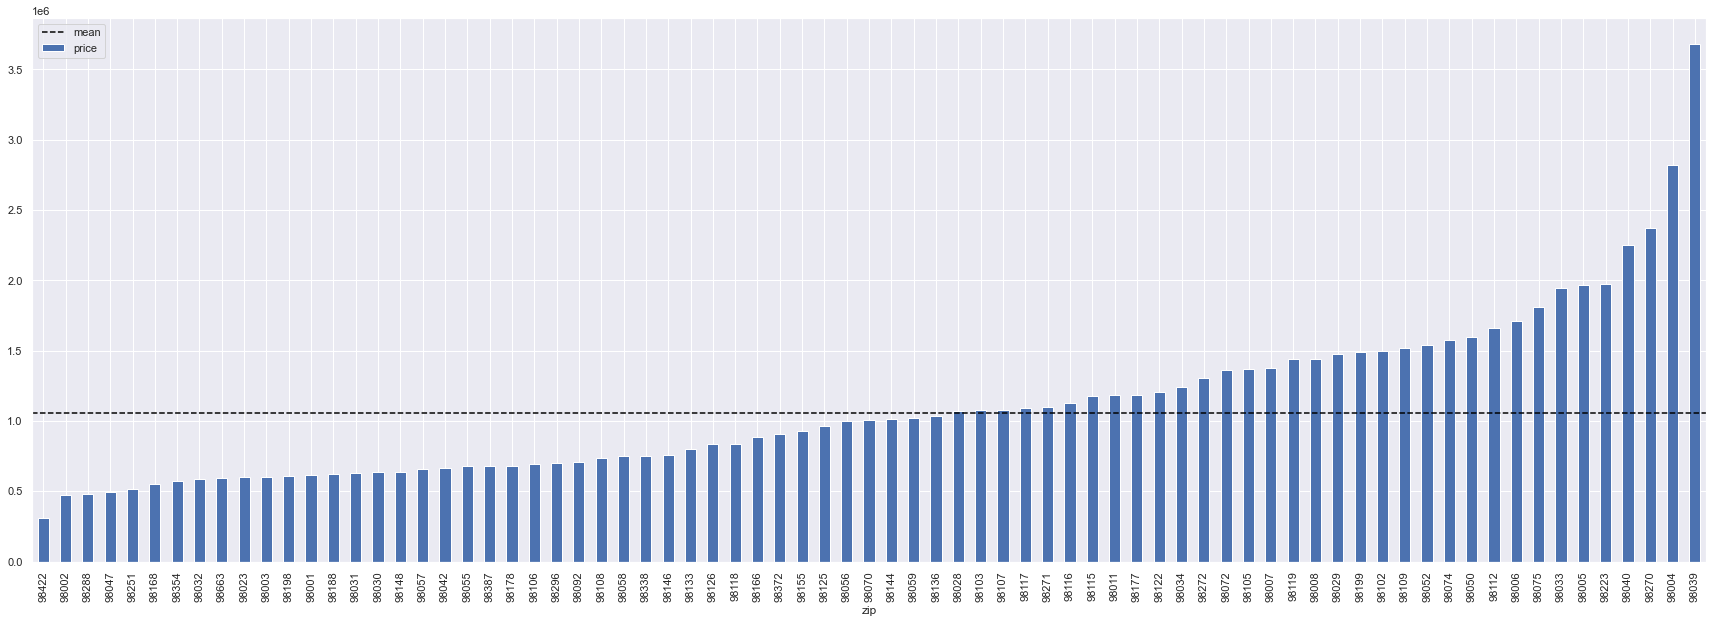

In [283]:
#check mean of zips again
fig, ax = plt.subplots(figsize=(30,10))
kc_clean.groupby("zip").mean().sort_values(by="price").plot.bar(y="price", ax=ax)
ax.axhline(y=kc_clean["price"].mean(), label="mean", color="black", linestyle="--")

ax.legend();

### Review Other Potential Predictors

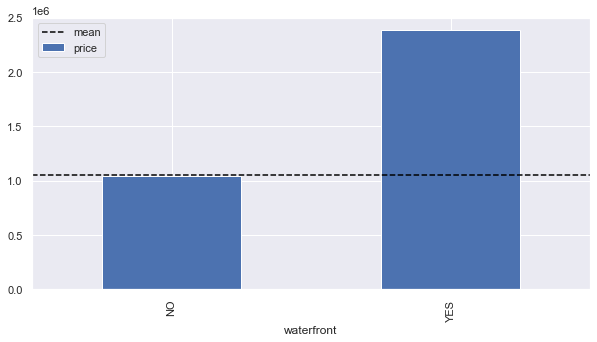

In [284]:
# Waterfront sns.barplot(data=df, x='waterfront', y='price')
fig, ax = plt.subplots(figsize=(10,5))
kc_clean.groupby("waterfront").mean().sort_values(by="price").plot.bar(y="price", ax=ax)
ax.axhline(y=kc_clean["price"].mean(), label="mean", color="black", linestyle="--")

ax.legend();

In [289]:
kc_clean['waterfront'].value_counts()

NO     23258
YES      302
Name: waterfront, dtype: int64

There's clearly a relationship between "price" and waterfront views.  We also should pay attention to the fact that there are very few houses that are on the waterfront, only 302 out of 27209.  While outlier values for things like sqft can be viewed easily with a scatterplot, it would have been easy to overlook the outlier qualities of a variable like 'waterfront' without looking more closely at the value counts.  Also, with such a large impact on price, and such a low volume of houses, we might want to remove waterfront houses from our final model- our client would not be interested in purchasing waterfont houses anyway because of the impact on price.

There's also likely strong colinearity between "zips" and "waterfront_YES", so as stated before, we should check for colinearity warnings if used in the same model.

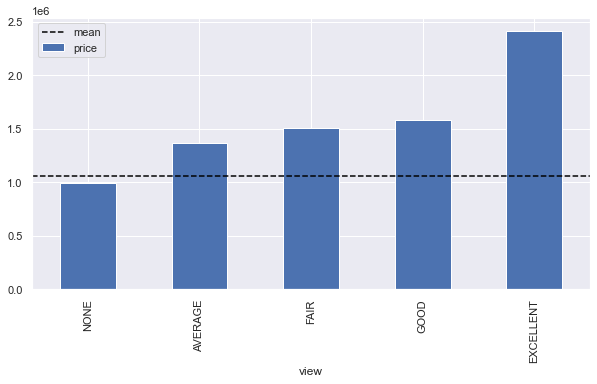

In [285]:
#view
fig, ax = plt.subplots(figsize=(10,5))
kc_clean.groupby("view").mean().sort_values(by="price").plot.bar(y="price", ax=ax)
ax.axhline(y=kc_clean["price"].mean(), label="mean", color="black", linestyle="--")

ax.legend();

In [286]:
kc_clean['view'].value_counts()

NONE         20901
AVERAGE       1475
GOOD           619
EXCELLENT      378
FAIR           187
Name: view, dtype: int64

Not looking great..."fair" and "good" look about equal, and there's a big uptick for "excellent". We can see that houses with no views tend to have mean sales prices that fall below the average price of a house in our cleaned KC data, whereas houses with even an average view are above the mean.  Looking at the value counts, there's again a disproportionate number of houses that do not have views (24179 out of 27209), much like our issue. with waterfront.  Viewed this way, houses with views could be percieved as outliers as well. 

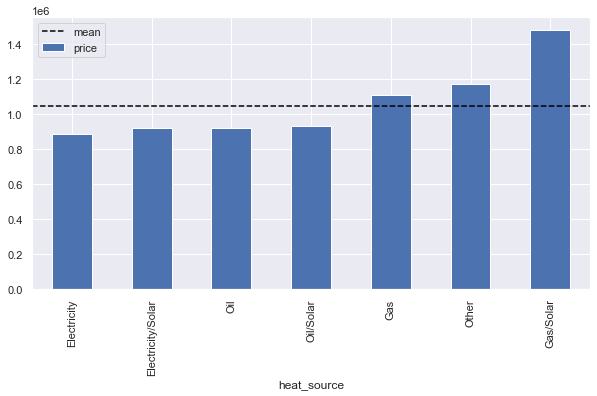

In [167]:
fig, ax = plt.subplots(figsize=(10,5))
kc_clean.groupby("heat_source").mean().sort_values(by="price").plot.bar(y="price", ax=ax)
ax.axhline(y=kc_clean["price"].mean(), label="mean", color="black", linestyle="--")

ax.legend();

I was curious if having solar power would add to the value of a house, but it looks like only houses that are equipped with gas and solar power experience an uptick in price compared to the median home price in Seattle.  However, it could be that other factors are at play.  Most large houses are unable to run exclusively on solar, and would need a backup for generating heat, hence the gas/solar mix.  There's also a statistically significant relationship between price and sqft so eco-freindly solar only smaller homes would be more likely to have smaller square footage, depressing their sales value. 

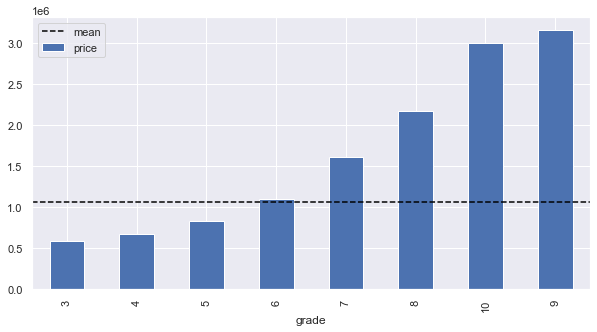

In [292]:

fig, ax = plt.subplots(figsize=(10,5))
kc_clean.groupby("grade").mean().sort_values(by="price").plot.bar(y="price", ax=ax)
ax.axhline(y=kc_clean["price"].mean(), label="mean", color="black", linestyle="--")

ax.legend();

In [293]:
kc_clean['grade'].value_counts()

5     10169
6      7384
7      2805
4      2036
8       849
3       153
9       148
10       16
Name: grade, dtype: int64

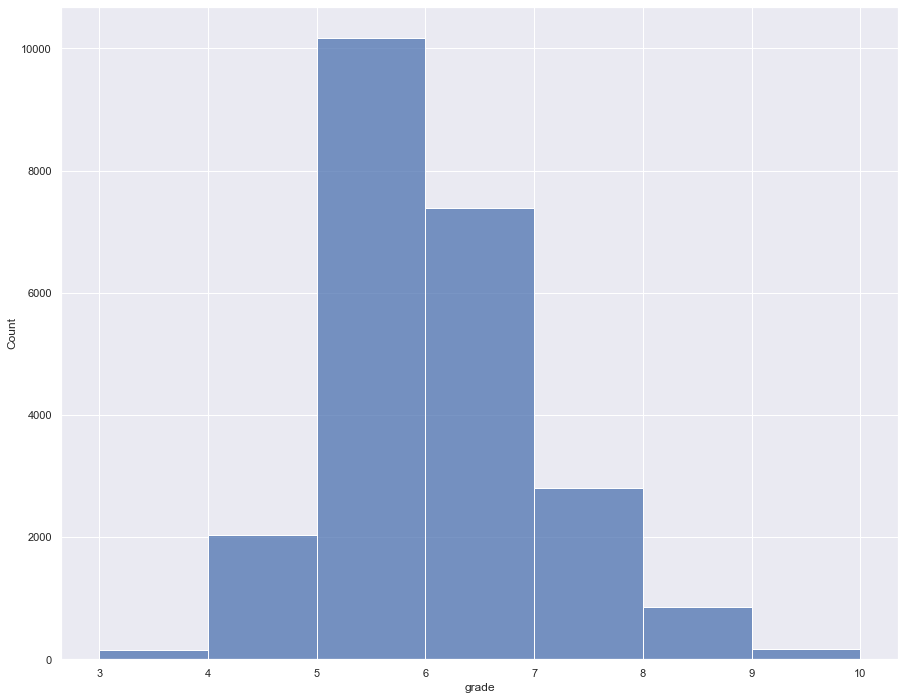

In [294]:
sns.histplot(data=kc_clean, x="grade", binwidth=1);


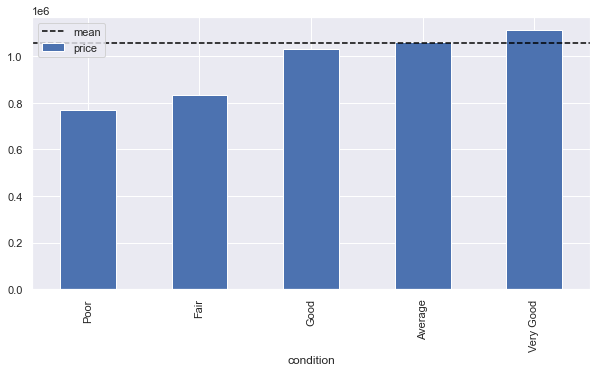

In [287]:
fig, ax = plt.subplots(figsize=(10,5))
kc_clean.groupby("condition").mean().sort_values(by="price").plot.bar(y="price", ax=ax)
ax.axhline(y=kc_clean["price"].mean(), label="mean", color="black", linestyle="--")

ax.legend();

In [290]:
kc_clean['condition'].value_counts()

Average      13870
Good          6746
Very Good     2746
Fair           163
Poor            35
Name: condition, dtype: int64

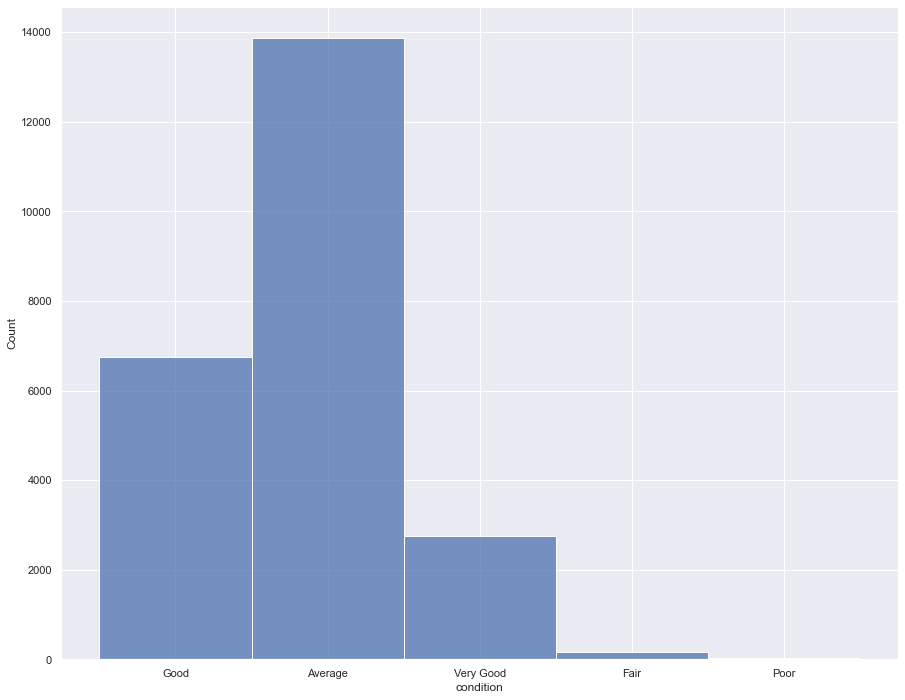

In [291]:
sns.histplot(data=kc_clean, x="condition", binwidth=1);


With the adjustments we made to grade, we would likely not need to use condition, which has an non-linear distribution anyway, making it more of a challange to use in a linear regression model.

### Summary: Categorical Variables

Of the categorical variables, waterfront, zip (when grouped by mean), and grade have the most linear relationships with price. However, knowing that we'll want to include zip codes in at least one of our models to identify the change in our mean home price for each neighborhood, we'll use grade both to avoid potential co-linearity between 'zip' and 'waterfront', but also because we know our client isn't interested in houses with extra features or amenities that will bump up price.  

## Modeling

### 1st model: Using Home Grade and Zip to Locate Affordable Neighborhoods 
Our first model will be unchanged by any kind of linear or logarithmic transformations. 

If the model is correctly specified, then we should see an even distribution of the residuals in a
scatter plot


In [297]:
y_raw = kc_clean["price"]
X_raw = kc_clean[['grade', 'zip']]
X_raw = pd.get_dummies(X_raw, columns=['zip', 'grade'])
X_raw.drop(['zip_98039', 'grade_3'], axis=1, inplace=True)


In [298]:
baseline_model = sm.OLS(y_raw, sm.add_constant(X_raw))
baseline_results = baseline_model.fit()
baseline_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     324.7
Date:                Wed, 01 Mar 2023   Prob (F-statistic):               0.00
Time:                        11:09:07   Log-Likelihood:            -3.4166e+05
No. Observations:               23560   AIC:                         6.835e+05
Df Residuals:                   23478   BIC:                         6.842e+05
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.047e+06   8.87e+04     34.374      0.000    2.87e+06    3.22e+06
zip_98001  -2.663e+06   8.17e+04    -32.573      0.000   -2.82e+06    -2.5e+06
zip_98002  -2.688e+06   8.36e+04    -32.143      0.000   -2.85e+06   -2.52e+06
zip_98003  -2.673e+06   8.27e+04    -32.324      0.000   -2.84e+06   -2.51e+06
zip_98004  -7.718e+05   8.56e+04     -9.021      0.000   -9.39e+05   -6.04e+05
zip_98005  -1.584e+06   8.83e+04    -17.944      0.000   -1.76e+06   -1.41e+06
zip_98006  -1.891e+06   8.23e+04    -22.995      0.000   -2.05e+06   -1.73e+06
zip_98007  -1.993e+06   8.85e+04    -22.524      0.000   -2.17e+06   -1.82e+06
zip_98008  -1.898e+06   8.31e+04    -22.854      0.000   -2.06e+06   -1.74e+06
zip_98011  -2.194e+06   8.49e+04    -25.831      0.000   -2.36e+06   -2.03e+06
zip_98023  -2.736e+06   8.15e+04    -33.567      0.000    -2.9e+06   -2.58e+06
zip_98028  -2.267e+06   8.36e+04    -27.126      0.000   -2.43e+06    -2.1e+06
zip_98029  -2.104e+06    8.4e+04    -25.055      0.000   -2.27e+06   -1.94e+06
zip_98030  -2.659e+06   8.32e+04    -31.957      0.000   -2.82e+06    -2.5e+06
zip_98031  -2.644e+06   8.21e+04    -32.196      0.000   -2.81e+06   -2.48e+06
zip_98032  -2.652e+06   8.73e+04    -30.363      0.000   -2.82e+06   -2.48e+06
zip_98033  -1.563e+06   8.18e+04    -19.097      0.000   -1.72e+06    -1.4e+06
zip_98034  -2.057e+06   8.15e+04    -25.245      0.000   -2.22e+06    -1.9e+06
zip_98040  -1.462e+06   8.45e+04    -17.312      0.000   -1.63e+06    -1.3e+06
zip_98042   -2.65e+06   8.09e+04    -32.775      0.000   -2.81e+06   -2.49e+06
zip_98047  -2.675e+06   9.68e+04    -27.639      0.000   -2.87e+06   -2.49e+06
zip_98050  -1.832e+06    3.5e+05     -5.239      0.000   -2.52e+06   -1.15e+06
zip_98052  -1.927e+06   8.19e+04    -23.531      0.000   -2.09e+06   -1.77e+06
zip_98055  -2.611e+06   8.59e+04    -30.386      0.000   -2.78e+06   -2.44e+06
zip_98056   -2.35e+06   8.23e+04    -28.555      0.000   -2.51e+06   -2.19e+06
zip_98057  -2.569e+06    9.2e+04    -27.936      0.000   -2.75e+06   -2.39e+06
zip_98058  -2.582e+06   8.15e+04    -31.673      0.000   -2.74e+06   -2.42e+06
zip_98059  -2.377e+06   8.19e+04    -29.025      0.000   -2.54e+06   -2.22e+06
zip_98070   -2.27e+06   8.75e+04    -25.939      0.000   -2.44e+06    -2.1e+06
zip_98072  -2.091e+06   8.38e+04    -24.933      0.000   -2.25e+06   -1.93e+06
zip_98074   -2.05e+06   8.31e+04    -24.670      0.000   -2.21e+06   -1.89e+06
zip_98075  -1.965e+06   8.32e+04    -23.615      0.000   -2.13e+06    -1.8e+06
zip_98092  -2.712e+06   8.18e+04    -33.158      0.000   -2.87e+06   -2.55e+06
zip_98102  -2.053e+06   8.95e+04    -22.936      0.000   -2.23e+06   -1.88e+06
zip_98103  -2.215e+06   8.14e+04    -27.223      0.000   -2.37e+06   -2.06e+06
zip_98105  -1.981e+06    8.4e+04    -23.588      0.000   -2.15e+06   -1.82e+06
zi

We can see that our model explains 52% of the variation in it by the r-squared value.  This is a little worrysome, because we have many (81) variables and would have expected to see a higher r-value as a result.   The model is statistically significant overall as demonstrated by the Prob(F-statistic), as are all of our predictors.  We can reject the null hypothesis that neighborhood and house grade have no impact on price.  We don't see any co-linearity warnings, so we can assume that we've done a good job of selected columns/variables. We do, however, have what appears to be an unusually high intercept of $3,047,000, that's a large mean price even for Seattle, and will need to center our model before we can make better sense of our coefficient values.  We'll also want to check our MAE, or mean absolute error, to see by how much our model may be off.  Our Durbin-Watson value is between the desired 1-2 range, indicating that our results are homoscedactic- the errors are evenly distributed, but our Jarque-Bera scores are super high, contradicting that.  We will run a test to check for homoscedasticity when we examine our models limitations.

In [306]:
# df with coeffiient and p-value.  Will use sorted ce's to find least expensive neighborhoods.
results_df = pd.concat([baseline_results.params, baseline_results.pvalues], axis=1)
results_df.columns = ["coefficient", "p-value"]


In [308]:
# check to see how many predictors are statistically significant
results_df = results_df[results_df["p-value"] < 0.05].sort_values(by="coefficient")
results_df

,coefficient,p-value
zip_98422,-3.068435e+06,3.274195e-10
zip_98372,-2.847351e+06,4.056524e-16
zip_98663,-2.783735e+06,1.762377e-15
zip_98023,-2.736321e+06,2.577170e-241
zip_98092,-2.711644e+06,1.177656e-235
...,...,...
grade_7,7.074108e+05,1.216353e-67
grade_8,1.105113e+06,4.932480e-143
grade_10,1.806142e+06,1.061684e-45
grade_9,1.982602e+06,8.135053e-265


In [303]:
# what's our mean error going to be?
mae_baseline = baseline_results.resid.abs().sum() / len(y_raw)
print(mae_baseline) 

257606.32439916566


That's a pretty high MAE, even for real estate.  First we'll center our model, then try to improve our it by log transforming price. 

### 2nd Model:  Centering Data to Improve Interpretability 

In [312]:
y_centered = y_raw.copy()
X_centered = X_raw.copy()

In [313]:
for col in X_centered.columns:
    X_centered[col] = X_centered[col] - X_centered[col].mean()
    
X_centered.describe()

,zip_98001,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98011,zip_98023,...,zip_98387,zip_98422,zip_98663,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10
count,2.356000e+04,2.356000e+04,2.356000e+04,2.356000e+04,2.356000e+04,2.356000e+04,2.356000e+04,2.356000e+04,2.356000e+04,2.356000e+04,...,2.356000e+04,2.356000e+04,2.356000e+04,2.356000e+04,2.356000e+04,2.356000e+04,2.356000e+04,2.356000e+04,2.356000e+04,2.356000e+04
mean,-9.462342e-18,-3.769857e-19,-1.507943e-18,1.507943e-18,3.015886e-18,-9.424644e-18,2.620051e-18,2.412709e-18,1.206354e-18,-4.825418e-18,...,2.356161e-21,2.356161e-21,-1.413697e-20,1.779373e-17,-3.694460e-18,4.327796e-17,2.246835e-17,3.619063e-18,-6.031772e-19,1.602189e-19
std,1.589412e-01,1.201235e-01,1.340143e-01,9.682976e-02,8.058568e-02,1.402647e-01,7.980201e-02,1.266248e-01,1.030712e-01,1.653789e-01,...,6.514969e-03,6.514969e-03,9.213362e-03,2.809858e-01,4.953128e-01,4.638904e-01,3.238633e-01,1.863828e-01,7.901036e-02,2.605158e-02
min,-2.593379e-02,-1.464346e-02,-1.829372e-02,-9.465195e-03,-6.536503e-03,-2.007640e-02,-6.409168e-03,-1.629881e-02,-1.073854e-02,-2.814092e-02,...,-4.244482e-05,-4.244482e-05,-8.488964e-05,-8.641766e-02,-4.316214e-01,-3.134126e-01,-1.190577e-01,-3.603565e-02,-6.281834e-03,-6.791171e-04
25%,-2.593379e-02,-1.464346e-02,-1.829372e-02,-9.465195e-03,-6.536503e-03,-2.007640e-02,-6.409168e-03,-1.629881e-02,-1.073854e-02,-2.814092e-02,...,-4.244482e-05,-4.244482e-05,-8.488964e-05,-8.641766e-02,-4.316214e-01,-3.134126e-01,-1.190577e-01,-3.603565e-02,-6.281834e-03,-6.791171e-04
50%,-2.593379e-02,-1.464346e-02,-1.829372e-02,-9.465195e-03,-6.536503e-03,-2.007640e-02,-6.409168e-03,-1.629881e-02,-1.073854e-02,-2.814092e-02,...,-4.244482e-05,-4.244482e-05,-8.488964e-05,-8.641766e-02,-4.316214e-01,-3.134126e-01,-1.190577e-01,-3.603565e-02,-6.281834e-03,-6.791171e-04
75%,-2.593379e-02,-1.464346e-02,-1.829372e-02,-9.465195e-03,-6.536503e-03,-2.007640e-02,-6.409168e-03,-1.629881e-02,-1.073854e-02,-2.814092e-02,...,-4.244482e-05,-4.244482e-05,-8.488964e-05,-8.641766e-02,5.683786e-01,6.865874e-01,-1.190577e-01,-3.603565e-02,-6.281834e-03,-6.791171e-04
max,9.740662e-01,9.853565e-01,9.817063e-01,9.905348e-01,9.934635e-01,9.799236e-01,9.935908e-01,9.837012e-01,9.892615e-01,9.718591e-01,...,9.999576e-01,9.999576e-01,9.999151e-01,9.135823e-01,5.683786e-01,6.865874e-01,8.809423e-01,9.639643e-01,9.937182e-01,9.993209e-01


In [314]:
X_centered_model = sm.OLS(y_centered, sm.add_constant(X_centered))
X_centered_results = X_centered_model.fit()
X_centered_results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     324.7
Date:                Wed, 01 Mar 2023   Prob (F-statistic):               0.00
Time:                        11:53:02   Log-Likelihood:            -3.4166e+05
No. Observations:               23560   AIC:                         6.835e+05
Df Residuals:                   23478   BIC:                         6.842e+05
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.057e+06   3136.783    336.814      0.000    1.05e+06    1.06e+06
zip_98001  -2.663e+06   8.17e+04    -32.573      0.000   -2.82e+06    -2.5e+06
zip_98002  -2.688e+06   8.36e+04    -32.143      0.000   -2.85e+06   -2.52e+06
zip_98003  -2.673e+06   8.27e+04    -32.324      0.000   -2.84e+06   -2.51e+06
zip_98004  -7.718e+05   8.56e+04     -9.021      0.000   -9.39e+05   -6.04e+05
zip_98005  -1.584e+06   8.83e+04    -17.944      0.000   -1.76e+06   -1.41e+06
zip_98006  -1.891e+06   8.23e+04    -22.995      0.000   -2.05e+06   -1.73e+06
zip_98007  -1.993e+06   8.85e+04    -22.524      0.000   -2.17e+06   -1.82e+06
zip_98008  -1.898e+06   8.31e+04    -22.854      0.000   -2.06e+06   -1.74e+06
zip_98011  -2.194e+06   8.49e+04    -25.831      0.000   -2.36e+06   -2.03e+06
zip_98023  -2.736e+06   8.15e+04    -33.567      0.000    -2.9e+06   -2.58e+06
zip_98028  -2.267e+06   8.36e+04    -27.126      0.000   -2.43e+06    -2.1e+06
zip_98029  -2.104e+06    8.4e+04    -25.055      0.000   -2.27e+06   -1.94e+06
zip_98030  -2.659e+06   8.32e+04    -31.957      0.000   -2.82e+06    -2.5e+06
zip_98031  -2.644e+06   8.21e+04    -32.196      0.000   -2.81e+06   -2.48e+06
zip_98032  -2.652e+06   8.73e+04    -30.363      0.000   -2.82e+06   -2.48e+06
zip_98033  -1.563e+06   8.18e+04    -19.097      0.000   -1.72e+06    -1.4e+06
zip_98034  -2.057e+06   8.15e+04    -25.245      0.000   -2.22e+06    -1.9e+06
zip_98040  -1.462e+06   8.45e+04    -17.312      0.000   -1.63e+06    -1.3e+06
zip_98042   -2.65e+06   8.09e+04    -32.775      0.000   -2.81e+06   -2.49e+06
zip_98047  -2.675e+06   9.68e+04    -27.639      0.000   -2.87e+06   -2.49e+06
zip_98050  -1.832e+06    3.5e+05     -5.239      0.000   -2.52e+06   -1.15e+06
zip_98052  -1.927e+06   8.19e+04    -23.531      0.000   -2.09e+06   -1.77e+06
zip_98055  -2.611e+06   8.59e+04    -30.386      0.000   -2.78e+06   -2.44e+06
zip_98056   -2.35e+06   8.23e+04    -28.555      0.000   -2.51e+06   -2.19e+06
zip_98057  -2.569e+06    9.2e+04    -27.936      0.000   -2.75e+06   -2.39e+06
zip_98058  -2.582e+06   8.15e+04    -31.673      0.000   -2.74e+06   -2.42e+06
zip_98059  -2.377e+06   8.19e+04    -29.025      0.000   -2.54e+06   -2.22e+06
zip_98070   -2.27e+06   8.75e+04    -25.939      0.000   -2.44e+06    -2.1e+06
zip_98072  -2.091e+06   8.38e+04    -24.933      0.000   -2.25e+06   -1.93e+06
zip_98074   -2.05e+06   8.31e+04    -24.670      0.000   -2.21e+06   -1.89e+06
zip_98075  -1.965e+06   8.32e+04    -23.615      0.000   -2.13e+06    -1.8e+06
zip_98092  -2.712e+06   8.18e+04    -33.158      0.000   -2.87e+06   -2.55e+06
zip_98102  -2.053e+06   8.95e+04    -22.936      0.000   -2.23e+06   -1.88e+06
zip_98103  -2.215e+06   8.14e+04    -27.223      0.000   -2.37e+06   -2.06e+06
zip_98105  -1.981e+06    8.4e+04    -23.588      0.000   -2.15e+06   -1.82e+06
zi

Ok!  This makes our coefficiants much more interpretable.  Our intercept is now 1,051,000, or the mean price of a house in all of King County.  We dropped our most expenzive zip, ' from the dataframe, so we can say that   For instance, let's look at the coefficient values of our two neighborhoods with the largest increases and decreases in price, Medina and Skykomish, we can see that average prices for two neighborhoods will be 3,224,000 above our intercept and 689,300 less than our intercept respectively.  


In [315]:
results2_df = pd.concat([X_centered_results.params,
                         X_centered_results.pvalues], axis=1)
results2_df.columns = ["coefficient", "p-value"]
results2_df

,coefficient,p-value
const,1.056513e+06,0.000000e+00
zip_98001,-2.662671e+06,1.150504e-227
zip_98002,-2.687887e+06,7.020840e-222
zip_98003,-2.672950e+06,2.648878e-224
zip_98004,-7.717847e+05,2.011148e-19
...,...,...
grade_6,3.337691e+05,6.033746e-17
grade_7,7.074108e+05,1.216353e-67
grade_8,1.105113e+06,4.932480e-143
grade_9,1.982602e+06,8.135053e-265


In [316]:
results2_df = results2_df[results2_df["p-value"] < 0.05].sort_values(by="coefficient")
len(results_df)

81

### 3rd Model: Log Transform 'price'


For this model we'll log transform price to deal with our linearity issues.

In [309]:
y_log = np.log(y_centered)
y_log.name = "log_SalePrice"
X_log_model = sm.OLS(y_log, sm.add_constant(X_centered))
X_log_results = X_log_model.fit()
X_log_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          log_SalePrice   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     398.4
Date:                Wed, 01 Mar 2023   Prob (F-statistic):               0.00
Time:                        11:51:42   Log-Likelihood:                -9037.3
No. Observations:               23455   AIC:                         1.824e+04
Df Residuals:                   23374   BIC:                         1.889e+04
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.4400      0.032    418.374      0.000      13.377      13.503
zip_98001     -0.5186      0.020    -26.443      0.000      -0.557      -0.480
zip_98002     -0.6361      0.023    -27.088      0.000      -0.682      -0.590
zip_98003     -0.5705      0.022    -26.285      0.000      -0.613      -0.528
zip_98004      0.7228      0.028     26.116      0.000       0.669       0.777
zip_98005      0.4271      0.032     13.426      0.000       0.365       0.489
zip_98006      0.2390      0.021     11.176      0.000       0.197       0.281
zip_98007      0.1957      0.032      6.086      0.000       0.133       0.259
zip_98008      0.2600      0.023     11.543      0.000       0.216       0.304
zip_98011      0.0320      0.026      1.219      0.223      -0.019       0.083
zip_98023     -0.5714      0.019    -29.786      0.000      -0.609      -0.534
zip_98028     -0.0516      0.023     -2.197      0.028      -0.098      -0.006
zip_98029      0.1096      0.025      4.471      0.000       0.062       0.158
zip_98030     -0.4997      0.023    -21.972      0.000      -0.544      -0.455
zip_98031     -0.4978      0.020    -24.285      0.000      -0.538      -0.458
zip_98032     -0.5318      0.030    -17.664      0.000      -0.591      -0.473
zip_98033      0.4192      0.020     20.713      0.000       0.380       0.459
zip_98034      0.1308      0.019      6.849      0.000       0.093       0.168
zip_98039      1.0240      0.061     16.795      0.000       0.904       1.144
zip_98040      0.4516      0.026     17.440      0.000       0.401       0.502
zip_98042     -0.4717      0.018    -26.905      0.000      -0.506      -0.437
zip_98047     -0.5986      0.043    -13.905      0.000      -0.683      -0.514
zip_98050      0.2500      0.252      0.991      0.322      -0.245       0.745
zip_98052      0.2422      0.020     11.982      0.000       0.203       0.282
zip_98055     -0.4252      0.028    -15.326      0.000      -0.480      -0.371
zip_98056     -0.1878      0.021     -8.914      0.000      -0.229      -0.146
zip_98057     -0.3710      0.037    -10.074      0.000      -0.443      -0.299
zip_98058     -0.3687      0.019    -19.286      0.000      -0.406      -0.331
zip_98059     -0.1542      0.020     -7.651      0.000      -0.194      -0.115
zip_98070     -0.0943      0.030     -3.115      0.002      -0.154      -0.035
zip_98072      0.0808      0.024      3.337      0.001       0.033       0.128
zip_98074      0.1482      0.023      6.460      0.000       0.103       0.193
zip_98075      0.2273      0.024      9.641      0.000       0.181       0.274
zip_98092     -0.5059      0.020    -25.465      0.000      -0.545      -0.467
zip_98102      0.1170      0.034      3.466      0.001       0.051       0.183
zip_98105      0.1472      0.024      6.049      0.000       0.100       0.195
zi

Now that we've log transformed our target variable (price), our model must be described using percentages rather than actual dollars.  So our variables can be interpreted as  

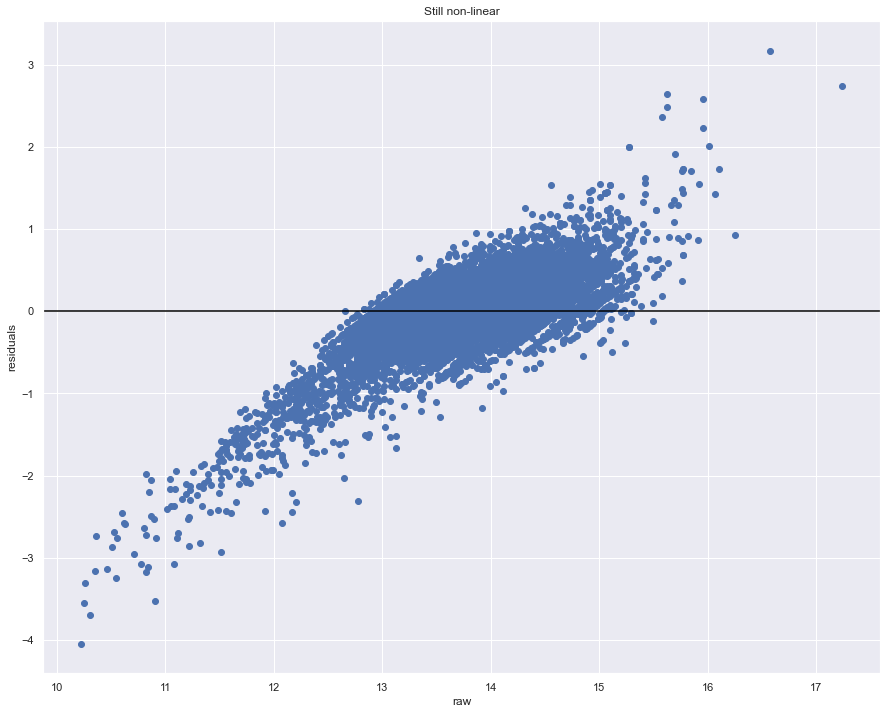

In [141]:
mae_baseline = baseline_results.resid.abs().sum() / len(y_log)
print("centered MAE:", mae_centered)
mae_log_centered = X_log_results.resid.abs().sum() / len(y_log)
print("Log MAE:", mae_log_centered)

centered MAE: 250708.25911936624
Log MAE: 0.2354231472561025


In [191]:
842300*mae_log_centered

198296.91693381514

At first glance, it may seem as if we've radically improved our MAE, but we need to remember that a log transformation changes the units we ae using from dollars to a decimal/percentage.  This makes it a little challenging to compare the two.  But we can translate that by multiplying our MAE by our intercept to derive a hard number

Although the frequency of values in the distribution of 'price' is not perfectly bell curve shaped, we can see that the clustering of data to the left of our untranformed histogram has been ditributed way more evenly around our peak, demonstrating that the log transformation in our final model has helped to make our data more suitable for modeling.  

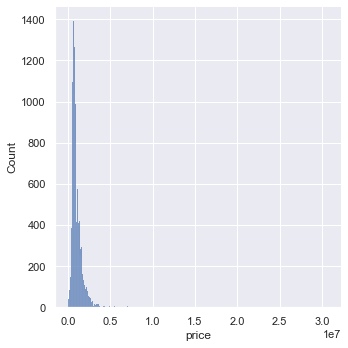

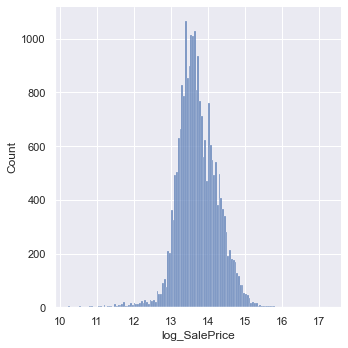

In [139]:
# did our log model normalize the distribution of 'price'? 
sns.displot(y_raw)#plot "price"
plt.show()
sns.displot(y_log)#plot "log price"
plt.show()


## Limitations

### Checking L.I.N.E.

* Linear relationship between the response variable (y) and predictor (x).  
   

* Data is independent: 1. Data avoids collinearity (features can't be used to predict each other)  2.  Data is not autocorrelated (correlated with itself)


* Model residuals are normally distributed
   

* Homoscedasticity- data has an equal variance


#### Linearity


We can check our linearity of our models by using a scatterplot of of the response variable (y) and the predictor (x).  We should see a constant change in y by a one unit change in x, as we did in our initial conversion of 'sqft_living' and 'grade' when we removed outliers.

#### Independence of Features and Errors

Our OLS model lacked any colinearity warnings- our variables were independant.  If we wanted to check that assumtion we could run a pairplot to check for coliearity between our response variable and predictors.

Autocorrelation, where a variable becomes correlated with itself will be harder to check for

#### Normally Distributed Residuals

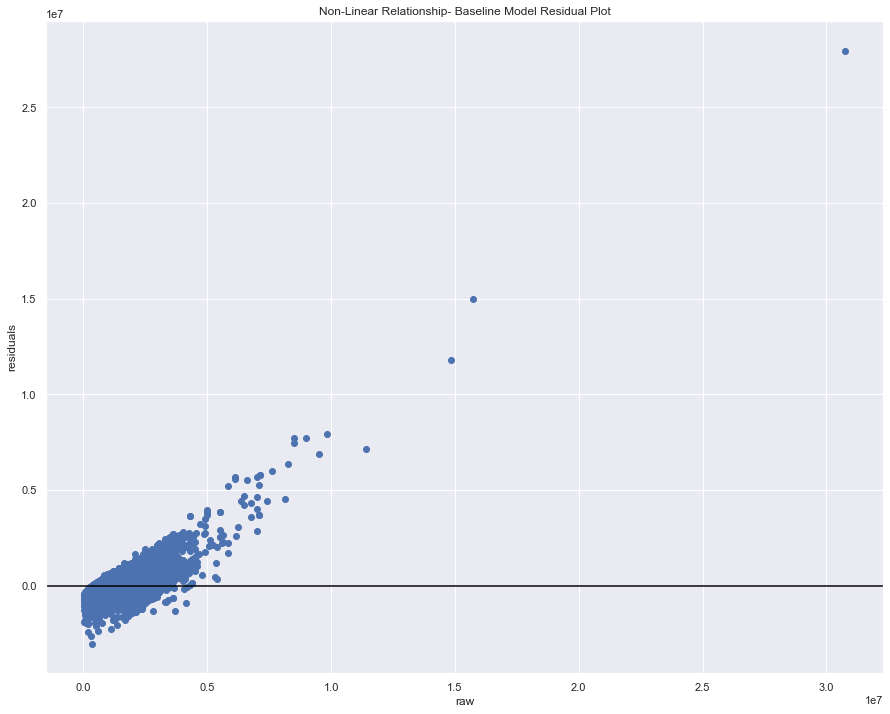

In [299]:
# Analyze coefficiants and p values here
fig, ax = plt.subplots()

ax.scatter(y_raw, baseline_results.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("raw")
ax.set_ylabel("residuals")
ax.set_title("Non-Linear Relationship- Baseline Model Residual Plot");

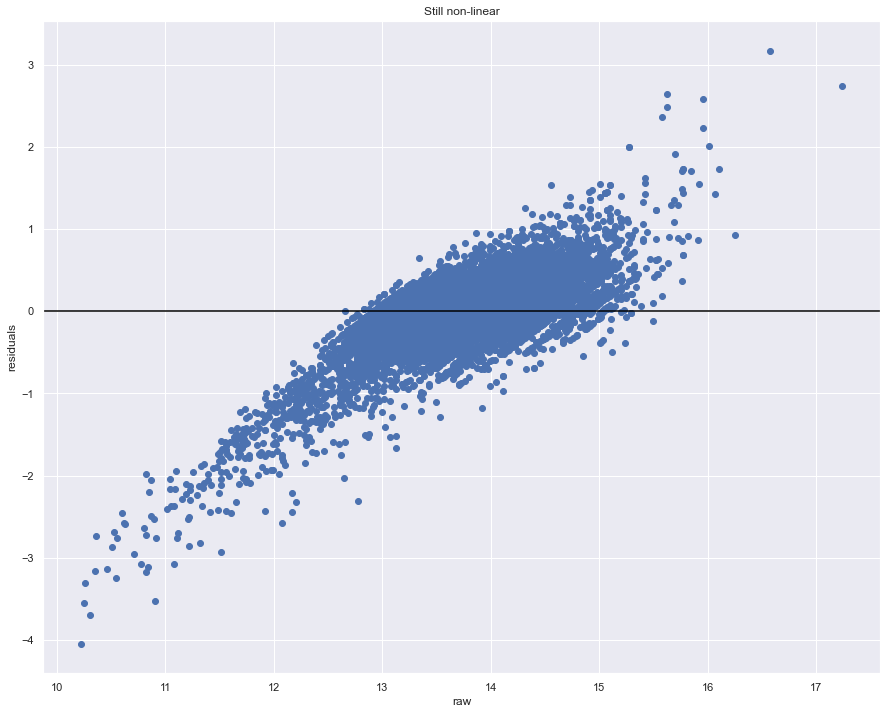

In [302]:
fig, ax = plt.subplots()

ax.scatter(y_log, X_log_results.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("raw")
ax.set_ylabel("residuals")
ax.set_title("Still non-linear");

If our data were normally distributed we would see our residuals scattered across the plot rather than clumped together like we do here.  But let's prove that there's a non-linear relationship between the variables in our model and price statistically as well by using a rainbow test.  In a rainbow test, even if the true relationship is non-linear, a good linear fit can be achieved on a subsample in the “middle” of the data, in the arc of the "rainbow".  The null hypothesis is the fit of the model using full sample is the same as using a central subset. The null hypothesis is rejected whenever the overall fit is significantly worse than the fit for the subsample.  A rainbow test returns the f-statistic and p-value, and unlike the way we usually interpret p-values (a low score is good) in this instance, a low score would indicate a non-linear relationship.

#### Equal Variance/Homoscedasticity

In [325]:
print("Baseline results:", linear_rainbow(baseline_results))
print("Log results:", linear_rainbow(X_log_results))

Baseline results: (1.2819950328065168, 1.7793138970585648e-41)
Log results: (0.9532202331749766, 0.9951979903239163)


## Recommendations

### Neighborhoods
Using our final model we have identified which neighborhoods we would be able to locate housing that would be in the lowest mean price by zipcode.  We can also see that we'll want to look for houses that are in low(3) to average(6) grade, as we see prices jumping over the median once we've crossed the average threshhold

## Next Steps

Affordable housing is a challange to find in the best of times, and often neighborhoods with lower housing prices are located nearby inherant health dangers like freeways or large industrial areas, or lack the kinds of amennities that inhance quality of life, like greenspaces and grocery stores.  Our next steps would be overlay a map of such amenities or dangers over the neighborhoods we've identified as being our most affordable, to analyze the additional benefits and risks of those neighborhoods and to allow our client to have a fuller understanding of its benefits or disadvantages.